In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline 

*consider the case when we have a small sample (n<30)*  
*the smaler the sample the larger deviation of the sample mean from the mean of population*

### <span style='background :Moccasin' > Step 1 </span>
*create population and sample*  
*1.1 generate normal distribution*

In [2]:
#normal distribution
mu, sigma = 100, 10 # mean and standard deviation
population = np.random.normal(mu, sigma, 10000).round(2)

*1.2 define statistics*

In [3]:
# calculated mean
mean_gen_pop = np.mean(population)
# calculated standard deviation
std_gen_pop = np.std(population)

*1.3 create sample*

In [6]:
#sample size
sample_size = 10
#sample generation
sample = np.random.choice(population, sample_size, False)

### <span style='background :Moccasin' > Step 2 </span>
*create z-distribution*  
*1.1 define standart error of mean*

In [7]:
se = std_gen_pop / sample_size ** 0.5
se

3.154801015916392

*1.2 define z-values, i.e. devations of sample means in units of standart error of mean:*
$$
z = \frac{X - \mu}{\sqrt{n}} \\
$$
*где X - среднее выборки, $\mu$ - mean of population*

In [8]:
#quantity of samples
n = 10000
z_scores=[]
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    #z-распределение
    z_score = (sample_mean - mean_gen_pop)/se
    z_scores.append(z_score)

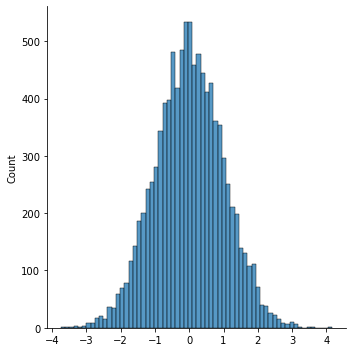

In [29]:
#distribution of general population
sns.displot(z_scores, kde = False)

### <span style='background :Moccasin' > Step 3 </span>
*create t-distribution*  
*3.1 define standart error of mean with using standart deviation of sample:*
$$
se_s = \frac{sd}{\sqrt{n}} \\
$$
*where sd - standart deviation of sample, n - sample size*

In [23]:
se_s = np.std(sample)/((sample_size-1) ** 0.5)
se_s

2.9776031374990932

*3.2 define t-values*  
$$
t = \frac{X - \mu}{se_s} \\
$$
*where X - sample mean, $\mu$ - mean of population*


In [24]:
#quantity of samples
n = 10000
t_scores=[]
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    #стандартная ошибка
    se = sample_std / sample_size ** 0.5
    #t-распределение
    t_score = (sample_mean - mean_gen_pop)/se
    t_scores.append(t_score)

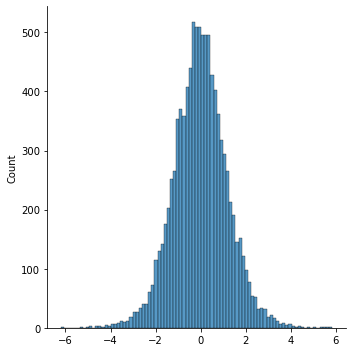

In [25]:
#distribution of mean
sns.displot(t_scores, kde = False)

### <span style='background :Moccasin' > P.S. (1) </span>
*Example: mean of population = 10, sample mean = 10.8, sd = 2, N = 25*  

In [35]:
m = 10
x, sd, N = 10.8, 2, 25
se = sd/np.sqrt(N)

*define z-value*

In [33]:
z = (x-m)/se
z

2.0000000000000018

*deviation from mean of population - 2*  
*define p-value with using "Normal" distribution*  
https://gallery.shinyapps.io/dist_calc/  
*p = 0.0455*  
*we can decline null hipotesis*

*define t-values*  
*number of degrees of freedom*  
*df = n-1 = 24*

In [39]:
se = sd/np.sqrt(N)
t = (x-m)/se
t

2.0000000000000018

*define p-value with using "t" distribution*  
*using t = 2 we get p-value 0.0569*  
*it will not allow us to reject the null hypothesis*  

### <span style='background :Moccasin' > P.S. (2) </span>
*table for calculation coefficient for confidence interval:*  
https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm